<a href="https://colab.research.google.com/github/roymalini/Quant-Wing-2020/blob/master/Question3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
from pandas_datareader import data as web
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#importing libraries
import pandas as pd
import pandas_datareader.data as pdr
import datetime


#importing top 20 stocks on S&P 500 as of today
assets = ['AAPL', 'MSFT','AMAZ', 'GOOG','GOOGL', 'FB', 'XOM', 'JNJ','V', 'PG','JPM','UNH','MA','INTC','VZ','HD','T','PFE','MRK','PEP']
tickers = assets

stock_cp = pd.DataFrame() # dataframe to store close price of each ticker
attempt = 0 # initializing passthrough variable
drop = [] # initializing list to store tickers whose close price was successfully extracted
while len(tickers) != 0 and attempt <= 5:
    tickers = [j for j in tickers if j not in drop] # removing stocks whose data has been extracted from the ticker list
    for i in range(len(tickers)):
        try:
            temp = pdr.get_data_yahoo(tickers[i],datetime.date.today()-datetime.timedelta(1095),datetime.date.today())
            temp.dropna(inplace = True)
            stock_cp[tickers[i]] = temp["Adj Close"]
            drop.append(tickers[i])       
        except:
            print(tickers[i]," :failed to fetch data...retrying")
            continue
    attempt+=1

In [ ]:
#stock_cp contains all adj close price
stock_cp

,AAPL,MSFT,AMAZ,GOOG,GOOGL,FB,XOM,JNJ,V,PG,JPM,UNH,MA,INTC,VZ,HD,T,PFE,MRK,PEP
Date,,,,,,,,,,,,,,,,,,,,
2017-08-17,151.627991,69.397232,0.40000,910.979980,927.659973,166.910004,65.664124,122.777962,100.193375,84.255180,83.208275,184.046967,128.709473,32.703300,41.970493,139.162613,31.440058,29.504158,56.580303,108.173141
2017-08-18,151.282242,69.483498,0.32702,910.669983,926.179993,167.410004,65.991318,122.399590,100.536629,84.621254,83.290871,182.251373,128.965149,32.554531,41.795212,137.135681,31.247730,29.253441,56.260075,107.451294
2017-08-21,151.003662,69.157600,0.32702,906.659973,920.869995,167.779999,65.767456,123.156357,101.232948,84.978134,83.189903,183.407059,129.751877,32.470844,42.189590,138.725632,31.423334,29.334024,56.699253,108.054352
2017-08-22,153.472183,70.125717,0.45780,924.690002,940.400024,169.639999,66.077438,124.309914,102.066597,84.914070,84.043549,186.043106,131.581039,32.219780,42.373631,139.385788,31.757801,29.683243,57.110973,107.743698
2017-08-23,153.664276,69.703972,0.45000,927.000000,942.580017,168.710007,65.965485,122.556480,101.193733,84.593796,84.144531,185.517792,130.863113,32.229080,42.312279,138.632675,31.707630,29.763838,56.863949,107.168053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-10,450.910004,208.250000,0.00640,1496.099976,1496.819946,263.000000,43.648899,148.029999,196.492935,134.100006,100.639999,319.100006,322.880005,49.220001,58.990002,274.730011,30.200001,38.389999,80.910004,135.979996
2020-08-11,437.500000,203.380005,0.00640,1480.319946,1480.540039,256.130005,44.100002,146.970001,197.471466,133.229996,103.820000,315.549988,328.540009,48.189999,58.509998,274.920013,30.200001,37.790001,80.910004,135.119995
2020-08-12,452.040009,209.190002,0.00680,1506.619995,1507.239990,259.890015,44.090000,149.660004,198.440002,135.460007,102.940002,322.269989,327.630005,49.189999,58.599998,281.579987,30.180000,38.330002,82.680000,137.800003


In [ ]:
#finding out correlation
stock_cp.corr()  

,AAPL,MSFT,AMAZ,GOOG,GOOGL,FB,XOM,JNJ,V,PG,JPM,UNH,MA,INTC,VZ,HD,T,PFE,MRK,PEP
AAPL,1.000000,0.937618,-0.681271,0.910062,0.908134,0.769108,-0.725400,0.736667,0.823195,0.755564,0.305703,0.817264,0.821033,0.710349,0.631918,0.884054,0.335458,0.106994,0.603405,0.747589
MSFT,0.937618,1.000000,-0.804042,0.902727,0.894470,0.699891,-0.747222,0.746293,0.936479,0.866381,0.324956,0.827105,0.932117,0.781653,0.784037,0.910234,0.318358,0.226182,0.771630,0.859532
AMAZ,-0.681271,-0.804042,1.000000,-0.601549,-0.593974,-0.332609,0.623180,-0.555669,-0.804181,-0.797352,-0.158328,-0.623284,-0.793663,-0.513618,-0.776871,-0.652756,-0.163901,-0.365567,-0.842237,-0.741760
GOOG,0.910062,0.902727,-0.601549,1.000000,0.999389,0.782871,-0.539074,0.702289,0.875733,0.736111,0.516043,0.834850,0.872775,0.826531,0.697523,0.920409,0.408174,0.210373,0.647085,0.770495
GOOGL,0.908134,0.894470,-0.593974,0.999389,1.000000,0.786321,-0.528015,0.700609,0.865686,0.724016,0.510497,0.834699,0.862297,0.817985,0.686548,0.915516,0.398157,0.211678,0.635937,0.759340
FB,0.769108,0.699891,-0.332609,0.782871,0.786321,1.000000,-0.422195,0.489431,0.634993,0.558737,0.306786,0.542197,0.638510,0.559714,0.327566,0.784074,0.376181,-0.115962,0.335029,0.597641
XOM,-0.725400,-0.747222,0.623180,-0.539074,-0.528015,-0.422195,1.000000,-0.482302,-0.530759,-0.588404,0.186787,-0.504446,-0.529047,-0.490865,-0.376395,-0.530131,-0.075149,0.206186,-0.377909,-0.526392
JNJ,0.736667,0.746293,-0.555669,0.702289,0.700609,0.489431,-0.482302,1.000000,0.673535,0.706648,0.263312,0.716478,0.654577,0.551332,0.672119,0.636957,0.263803,0.380783,0.621206,0.741199
V,0.823195,0.936479,-0.804181,0.875733,0.865686,0.634993,-0.530759,0.673535,1.000000,0.891015,0.539601,0.784178,0.996705,0.785481,0.876644,0.907875,0.440844,0.366460,0.884769,0.904209
PG,0.755564,0.866381,-0.797352,0.736111,0.724016,0.558737,-0.588404,0.706648,0.891015,1.000000,0.394262,0.594923,0.887010,0.603623,0.860718,0.797102,0.545191,0.221376,0.887513,0.964808


In [ ]:
#choosing 5 stocks from sklearn.cluster import SpectralBiclustering

model = SpectralBiclustering(n_clusters=5, method='log', random_state=0)
model.fit(stock_cp.corr())


asset_srt = np.array(assets)
sorted = np.argsort(model.row_labels_)

for i in range(len(model.row_labels_)):
  asset_srt[i] = assets[sorted[i]]

stocks = asset_srt[7:12]

In [ ]:
#final stocks list with least corelated stocks
stocks

array(['AMAZ', 'JPM', 'T', 'JNJ', 'GOOGL'], dtype='<U5')

In [ ]:
stock_cp = stock_cp[stocks]
stock_cp

,AMAZ,JPM,T,JNJ,GOOGL
Date,,,,,
2017-08-17,0.40000,83.208275,31.440058,122.777962,927.659973
2017-08-18,0.32702,83.290871,31.247730,122.399590,926.179993
2017-08-21,0.32702,83.189903,31.423334,123.156357,920.869995
2017-08-22,0.45780,84.043549,31.757801,124.309914,940.400024
2017-08-23,0.45000,84.144531,31.707630,122.556480,942.580017
...,...,...,...,...,...
2020-08-10,0.00640,100.639999,30.200001,148.029999,1496.819946
2020-08-11,0.00640,103.820000,30.200001,146.970001,1480.540039
2020-08-12,0.00680,102.940002,30.180000,149.660004,1507.239990


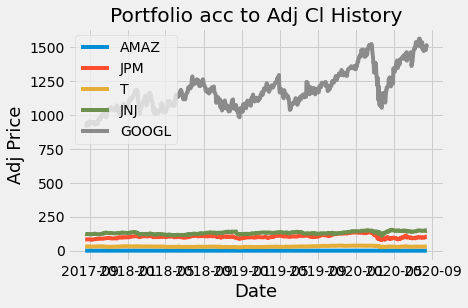

In [ ]:
#plotting 5 stocks according to Adj close price history
title='Portfolio acc to Adj Cl History'
for c in stock_cp.columns.values:
  plt.plot(stock_cp[c],label=c)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj Price',fontsize=18)
plt.legend(stock_cp.columns ,loc='upper left')
plt.show()

In [ ]:
#calculating returns
returns=stock_cp.pct_change()
returns

,AMAZ,JPM,T,JNJ,GOOGL
Date,,,,,
2017-08-17,NaN,NaN,NaN,NaN,NaN
2017-08-18,-0.182450,0.000993,-0.006117,-0.003082,-0.001595
2017-08-21,0.000000,-0.001212,0.005620,0.006183,-0.005733
2017-08-22,0.399914,0.010261,0.010644,0.009367,0.021208
2017-08-23,-0.017038,0.001202,-0.001580,-0.014105,0.002318
...,...,...,...,...,...
2020-08-10,0.015873,0.012679,0.005996,-0.003836,-0.001034
2020-08-11,0.000000,0.031598,0.000000,-0.007161,-0.010876
2020-08-12,0.062500,-0.008476,-0.000662,0.018303,0.018034


In [ ]:
#create cov matrix
cov_matrix=returns.cov()*252
cov_matrix

,AMAZ,JPM,T,JNJ,GOOGL
AMAZ,4.765642,0.065242,0.003665,0.008196,0.044677
JPM,0.065242,0.114063,0.057696,0.038107,0.057322
T,0.003665,0.057696,0.072000,0.031866,0.035478
JNJ,0.008196,0.038107,0.031866,0.053509,0.032922
GOOGL,0.044677,0.057322,0.035478,0.032922,0.086709


In [ ]:
#calculating portfolio varience
weights=np.array([0.2,0.2,0.2,0.2,0.2])
port_var= np.dot(weights.T,np.dot(cov_matrix,weights))
port_var

0.2336905818660056

In [ ]:
#annual return
portfoliosum=np.sum(returns.mean()*weights) *252
portfoliosum

0.2010081211001467

In [ ]:
#volatility
port_volatility=np.sqrt(port_var)
port_volatility

0.4834155374685485

In [ ]:
#expected annual return, volatility,varience
percent_var=str(round(port_var,2)*100)+'%'
percent_volatility=str(round(port_volatility,2)*100)+'%'
percent_return=str(round(portfoliosum,2)*100)+'%'
print('Expected annual return ' +percent_return)
print('Annual volatility ' +percent_return)
print('Annual varience ' +percent_return)


Expected annual return 20.0%
Annual volatility 20.0%
Annual varience 20.0%


In [ ]:
pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 1.8MB/s 


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


In [ ]:
#portfolio optimisation

mu=expected_returns.mean_historical_return(stock_cp)
S=risk_models.sample_cov(stock_cp)

#optimise for max sharpe ratio
ef = EfficientFrontier(mu, S,(-1,1))
weights=ef.max_sharpe()
cleaned_weights=ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AMAZ', 0.05181), ('JPM', 0.22967), ('T', -1.01908), ('JNJ', 0.37021), ('GOOGL', 1.3674)])
Expected annual return: 35.1%
Annual volatility: 44.4%
Sharpe Ratio: 0.75


(0.3512484354368102, 0.4435519606623277, 0.7468086375769327)